# ソース [Store Sales - Time Series Forecasting](https://www.kaggle.com/c/store-sales-time-series-forecasting/data) 

# 目的：エクアドルの人気ショップで販売されている1000種類の商品の売上を予測すること

# 仮説：与えたonpromotion(プロモーション商品)により、sales(売上)をある程度予測できるのではないか。

In [1]:
import os
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

# データの読み込み

In [2]:
data_oil = pd.read_csv('oil.csv')
train_data = pd.read_csv('train.csv', index_col=0)
test_data = pd.read_csv('test.csv', index_col=0)
samp_subm = pd.read_csv('sample_submission.csv')
data_holi = pd.read_csv('holidays_events.csv')
data_store =  pd.read_csv('stores.csv')
data_trans = pd.read_csv('transactions.csv')

### 【train.csv】について
##### ・<span style="color: red; ">store_nbr</span> 商品が販売されている店舗
##### ・<span style="color: red; ">family</span> 商品の種類
##### ・<span style="color: red; ">onpromotion</span> ある日にある店で販売促進されている商品の数

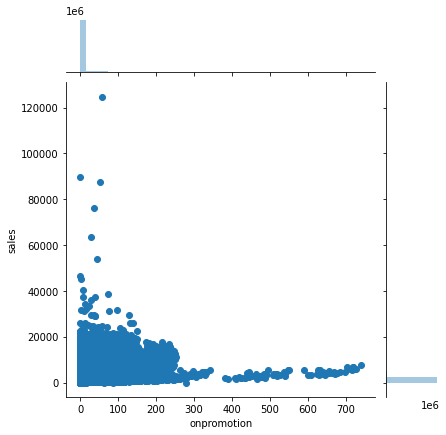

In [3]:
sns.jointplot(x='onpromotion', y='sales', data=train_data)

### この描写では、salesが２００００以下のデータがどうなっているのかが見えていないので、次のセルで可視化する。

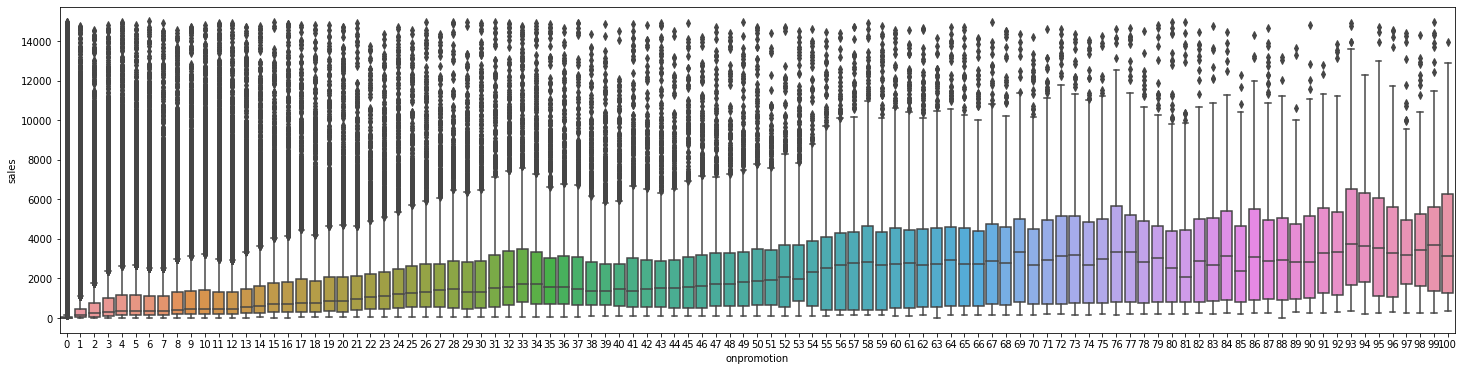

In [4]:
fig, ax = plt.subplots(figsize=(25,6))
y1 = train_data.query("sales <= 15000 & onpromotion <=100")
sns.boxplot(x='onpromotion', y='sales', data=y1)

### 分析の結果、プロモーションが、全体的な売上に寄与しているということが判明した。

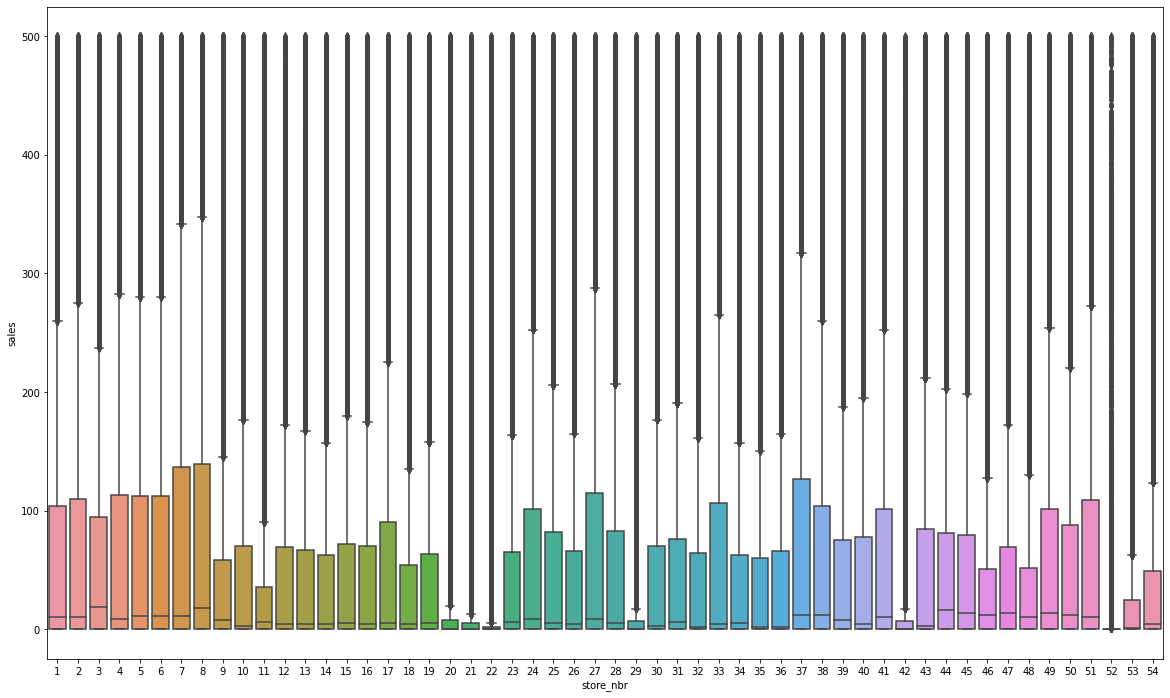

In [5]:
fig, ax = plt.subplots(figsize=(20,12))
y1 = train_data.query("sales <= 500 & store_nbr <=100")
sns.boxplot(x='store_nbr', y='sales', data=y1)

## 分析の結果：store_nbr(店舗数)が増えてもsales(売上)は増加していない。従って、store_nbr(店舗数)はsales(売上)に寄与する変数とは言えない。

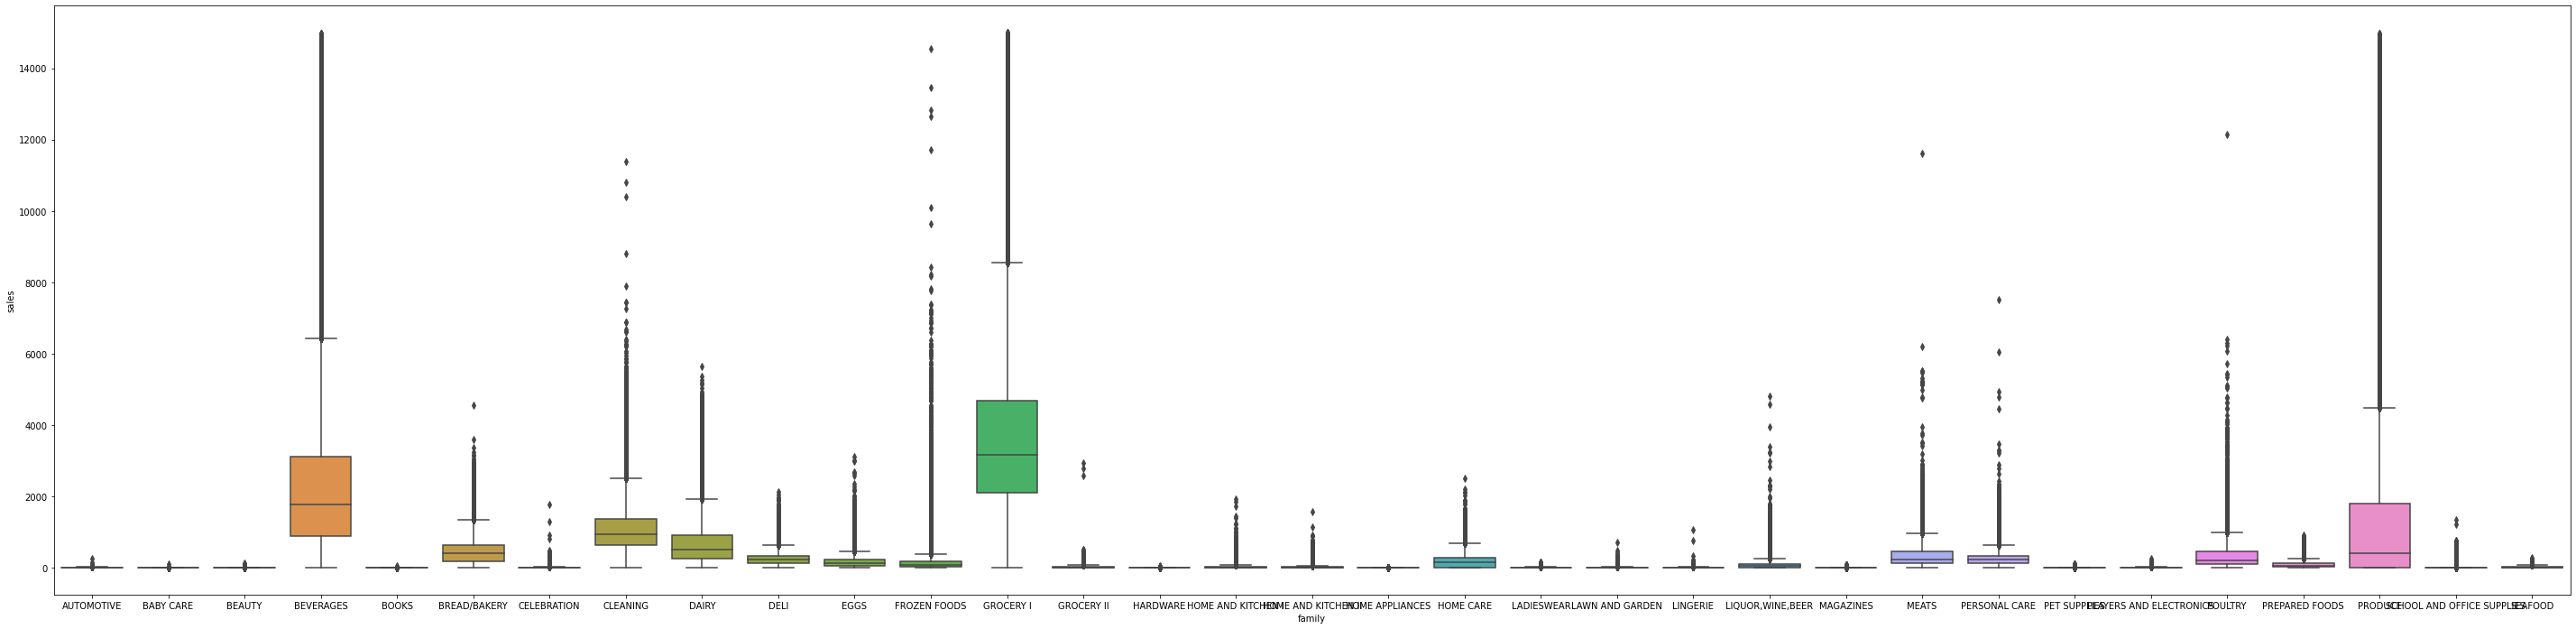

In [6]:
fig, ax = plt.subplots(figsize=(50,12))
y1 = train_data.query("sales <= 15000")
sns.boxplot(x='family', y='sales', data=y1)

## 分析の結果：特定の製品のsales(売上)が際立っている。GROCERY IとBEVERAGESがsales(売上)に寄与していると言える。

# 概要

In [7]:
print('訓練データのサンプル数は: ', len(train_data.index),'個です。')
print('テストデータのサンプル数は: ', len(test_data.index),'個です。')
print('特徴量（説明変数）の数は: ', len(train_data.columns),'個です。')

訓練データのサンプル数は:  3000888 個です。
テストデータのサンプル数は:  28512 個です。
特徴量（説明変数）の数は:  5 個です。


In [8]:
train_data.head()

,date,store_nbr,family,sales,onpromotion
id,,,,,
0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,2013-01-01,1,BABY CARE,0.0,0
2,2013-01-01,1,BEAUTY,0.0,0
3,2013-01-01,1,BEVERAGES,0.0,0
4,2013-01-01,1,BOOKS,0.0,0


In [9]:
test_data.head()

,date,store_nbr,family,onpromotion
id,,,,
3000888,2017-08-16,1,AUTOMOTIVE,0
3000889,2017-08-16,1,BABY CARE,0
3000890,2017-08-16,1,BEAUTY,2
3000891,2017-08-16,1,BEVERAGES,20
3000892,2017-08-16,1,BOOKS,0


In [10]:
train_data['family'].value_counts()[0:3]

HOME APPLIANCES    90936
DAIRY              90936
BEVERAGES          90936
Name: family, dtype: int64

# 特徴量の作成

In [11]:
features = ['store_nbr', 'family', 'onpromotion'] #特徴量
target = 'sales' #目的変数

## カテゴリ変数のエンコーディング(カテゴリ変数の数値化)

In [12]:
enc = preprocessing.LabelEncoder()
enc.fit(train_data['family'])

LabelEncoder()

In [13]:
train_data['family'] = enc.transform(train_data['family'])
test_data['family'] = enc.transform(test_data['family'])

In [14]:
X_train = train_data[features]
y_train = train_data[target]
X_test = test_data[features]

In [15]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.33, random_state=2021)

In [16]:
model = LinearRegression(normalize=True).fit(X_train, y_train)
y_val_pred = model.predict(X_val)
y_val_pred = np.where(y_val_pred<0, 0, y_val_pred)
hensuu=np.sqrt(mean_squared_error(y_val, y_val_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_val, y_val_pred)))

Root Mean Squared Error: 988.7397945038912


(0.0, 30000.0)

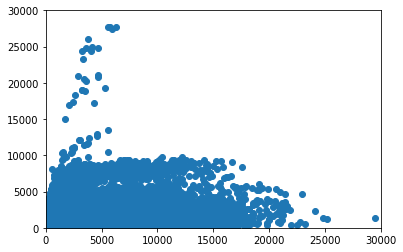

In [20]:
plt.scatter(y_val,y_val_pred)
plt.xlim(0,30000)
plt.ylim(0,30000)

## 実際の値y_valと予測結果であるy_val_predの相関関係を分析すべく作図した。

## 結論:実際の値と予測値は無相関であった。従って、与えたonpromotionでsalesをある程度予測できるという仮説は誤りである。